Objects of 3x3x3 blocs

In [ ]:
import numpy as np

In [ ]:
def get_x_profile(array):
  return np.array([array[i].sum() for i in range(len(array))])

def get_y_profile(array):
  return np.array([sum([array[j][i].sum() for j in range(len(array))]) for i in range(len(array))])

def get_z_profile(array):
  return np.array([sum([sum([array[k][j][i] for k in range(len(array))]) for j in range(len(array))]) for i in range(len(array))])

def get_zz_profile(array):
  ret_array = np.zeros((corner_n * 2 - 1))
  for x in range(corner_n):
    for y in range(corner_n):
      for z in range(corner_n):
        ret_array[x + y] += array[x][y][z]
  return ret_array   

def get_yy_profile(array):
  ret_array = np.zeros((corner_n * 2 - 1))
  for x in range(corner_n):
    for y in range(corner_n):
      for z in range(corner_n):
        ret_array[x + z] += array[x][y][z]
  return ret_array

def get_xx_profile(array):
  ret_array = np.zeros((corner_n * 2 - 1))
  for x in range(corner_n):
    for y in range(corner_n):
      for z in range(corner_n):
        ret_array[z + y] += array[x][y][z]
  return ret_array

In [ ]:
corner_n = 3
obj = np.random.randint(0, high=2, size=(corner_n, corner_n, corner_n))

res = np.concatenate((get_x_profile(obj),
                get_y_profile(obj),
                get_z_profile(obj),
                get_zz_profile(obj),
                get_yy_profile(obj),
                get_xx_profile(obj)))
total_arguments = len(res)
print(total_arguments)

24


In [ ]:
train_len = 30000

train_objects = np.empty((train_len, corner_n, corner_n, corner_n))

for i in range(train_len):
  train_objects[i] = np.random.randint(0, high=2, size=(corner_n, corner_n, corner_n))

train_outputs = np.empty((train_len, total_arguments))

for i in range(train_len):
  train_outputs[i] = np.concatenate((get_x_profile(train_objects[i]),
                                     get_y_profile(train_objects[i]),
                                     get_z_profile(train_objects[i]),
                                     get_zz_profile(train_objects[i]),
                                     get_yy_profile(train_objects[i]),
                                     get_xx_profile(train_objects[i])))


In [ ]:
test_len = 1000

test_objects = np.empty((test_len, corner_n, corner_n, corner_n))

for i in range(test_len):
  test_objects[i] = np.random.randint(0, high=2, size=(corner_n, corner_n, corner_n))

test_outputs = np.empty((test_len, total_arguments))

for i in range(test_len):
  test_outputs[i] = np.concatenate((get_x_profile(test_objects[i]),
                                    get_y_profile(test_objects[i]),
                                    get_z_profile(test_objects[i]),
                                    get_zz_profile(test_objects[i]),
                                    get_yy_profile(test_objects[i]),
                                    get_xx_profile(test_objects[i])))

Creamos el modelo para objetos 3x3x3

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_cube = [[[0] * corner_n for i in range(corner_n)] for j in range(corner_n)]


for x in range(corner_n):
  for y in range(corner_n):
    for z in range(corner_n):
      model_cube[x][y][z] = keras.Sequential([
                            keras.layers.Flatten(input_shape = (total_arguments,)),
                            keras.layers.Dense(128, activation='relu'),
                            keras.layers.Dense(256, activation='relu'),
                            keras.layers.Dense(128, activation='sigmoid'),
                            keras.layers.Dense(27, activation="sigmoid"),
                            keras.layers.Dense(1, activation="sigmoid")
                            ])
      model_cube[x][y][z].compile(optimizer='adam',
                    loss='mse',
                    metrics=['accuracy'])



In [ ]:
for x in range(corner_n):
  for y in range(corner_n):
    for z in range(corner_n):
      print(f"{x}, {y}, {z}")
      model_cube[x][y][z].fit(train_outputs, train_objects[:,x,y,z], epochs=6)



0, 0, 0
Epoch 1/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0480 - accuracy: 0.9329
Epoch 2/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0470 - accuracy: 0.9362
Epoch 3/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0449 - accuracy: 0.9378
Epoch 4/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0447 - accuracy: 0.9401
Epoch 5/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0435 - accuracy: 0.9399
Epoch 6/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0432 - accuracy: 0.9407
0, 0, 1
Epoch 1/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0777 - accuracy: 0.8887
Epoch 2/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0767 - accuracy: 0.8908
Epoch 3/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0764 - accuracy: 0.8904
Epoch 4/6
938/938 [==============================] - 3s 3ms/step - loss: 0.0758 - accuracy: 0

In [ ]:
for x in range(corner_n):
  for y in range(corner_n):
    for z in range(corner_n):
      test_loss, test_acc = model_cube[x][y][z].evaluate(test_outputs, test_objects[:,x,y,z], verbose=1)
      print('Test accuracy: ', test_acc)



32/32 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9460
Test accuracy:  0.9459999799728394
32/32 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.8990
Test accuracy:  0.8989999890327454
32/32 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9000
Test accuracy:  0.8999999761581421
32/32 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.8830
Test accuracy:  0.8830000162124634
32/32 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.8970
Test accuracy:  0.8970000147819519
32/32 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.8620
Test accuracy:  0.8619999885559082
32/32 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.8750
Test accuracy:  0.875
32/32 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.8670
Test accuracy:  0.8669999837875366
32/32 [==============================

In [ ]:
print(test_outputs.shape)
print(np.transpose(model_cube[0][0][0].predict(test_outputs))[0].shape)

predictions = np.empty((test_len, corner_n, corner_n, corner_n))


for x in range(corner_n):
  for y in range(corner_n):
    for z in range(corner_n):
      predictions[:,x,y,z] = np.transpose(model_cube[x][y][z].predict(test_outputs))[0]


(1000, 24)
(1000,)


In [ ]:
predicted_test_objects = np.rint(predictions)

correct_predictions = 0
false_predictions = 0
for i in range(test_len):
  for x in range(corner_n):
    for y in range(corner_n):
      for z in range(corner_n):
        if (predicted_test_objects[i,x,y,z] == test_objects[i, x, y, z]):
          correct_predictions += 1
        else:
          false_predictions +=1

print(correct_predictions/(false_predictions+correct_predictions))
print(correct_predictions)
print(false_predictions)


0.8928518518518519
24107
2893


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [ ]:
index = 120

predicted_shape = np.rint(predictions[index])
real_shape = test_objects[index]
print(real_shape)
print(predicted_shape)
print(test_outputs[index])

[[[0. 1. 0.]
  [1. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 1.]
  [1. 1. 0.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [1. 1. 0.]]]
[[[0. 1. 0.]
  [1. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 0.]
  [1. 1. 0.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [1. 1. 0.]]]
[3. 6. 3. 4. 4. 4. 4. 6. 2. 1. 5. 1. 3. 2. 1. 4. 3. 4. 0. 1. 3. 5. 3. 0.]


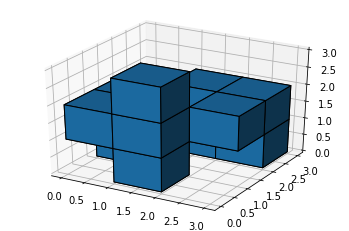

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(predicted_shape, edgecolor="k")

plt.show()

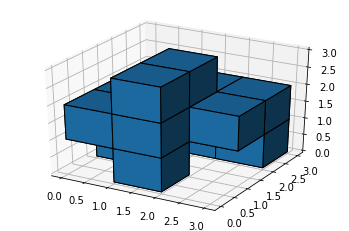

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(real_shape, edgecolor="k")

plt.show()

In [ ]:
print(train_objects[1])

[[[1. 0. 0.]
  [1. 1. 1.]
  [0. 0. 1.]]

 [[1. 1. 0.]
  [1. 0. 1.]
  [0. 1. 0.]]

 [[0. 1. 1.]
  [0. 1. 0.]
  [0. 0. 1.]]]
